In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller

# Load the dataset
# For demonstration, we'll use a built-in dataset from statsmodels
from statsmodels.datasets import macrodata
data = macrodata.load_pandas().data

# We'll focus on the 'realgdp', 'realcons', and 'realinv' columns for this example
data.index = pd.date_range(start='1959Q1', periods=len(data), freq='Q')
ts = data[['realgdp', 'realcons', 'realinv']]

# Plot the time series
ts.plot(figsize=(12, 8))
plt.title('Macro Data Time Series')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

# Perform Dickey-Fuller test to check for stationarity
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna())
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    print()

# Apply ADF test on each time series
for name, column in ts.iteritems():
    adf_test(column, name)

# Differencing the data to make it stationary
ts_differenced = ts.diff().dropna()

# Plot differenced time series
ts_differenced.plot(figsize=(12, 8))
plt.title('Differenced Macro Data Time Series')
plt.xlabel('Year')
plt.ylabel('Differenced Value')
plt.show()

# Check for stationarity after differencing
for name, column in ts_differenced.iteritems():
    adf_test(column, name)

# Fit VARMAX model
model = VARMAX(ts_differenced, order=(1, 1))
results = model.fit(maxiter=1000, disp=False)
print(results.summary())

# Forecasting
n_forecast = 5
forecast = results.get_forecast(steps=n_forecast)
forecast_df = forecast.summary_frame()

# Reverse the differencing to get the forecast in original scale
def invert_transformation(df, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df.columns
    for col in columns:        
        df_fc[col] = df[col].iloc[-1] + df_fc[col].cumsum()
    return df_fc

forecast_df_original = invert_transformation(ts, forecast_df)

# Plot forecasted values
plt.figure(figsize=(12, 8))
plt.plot(ts.index, ts['realgdp'], label='Observed GDP')
plt.plot(forecast_df_original.index, forecast_df_original['realgdp'], label='Forecasted GDP', linestyle='--')
plt.title('GDP Forecast')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

# Plot forecasted values for all variables
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
for i, col in enumerate(ts.columns):
    axes[i].plot(ts.index, ts[col], label=f'Observed {col}')
    axes[i].plot(forecast_df_original.index, forecast_df_original[col], label=f'Forecasted {col}', linestyle='--')
    axes[i].set_title(f'{col} Forecast')
    axes[i].legend()
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller


In [2]:
from statsmodels.datasets import macrodata
data = macrodata.load_pandas().data


In [3]:
data.index = pd.date_range(start='1959Q1', periods=len(data), freq='Q')
ts = data[['realgdp', 'realcons', 'realinv']]


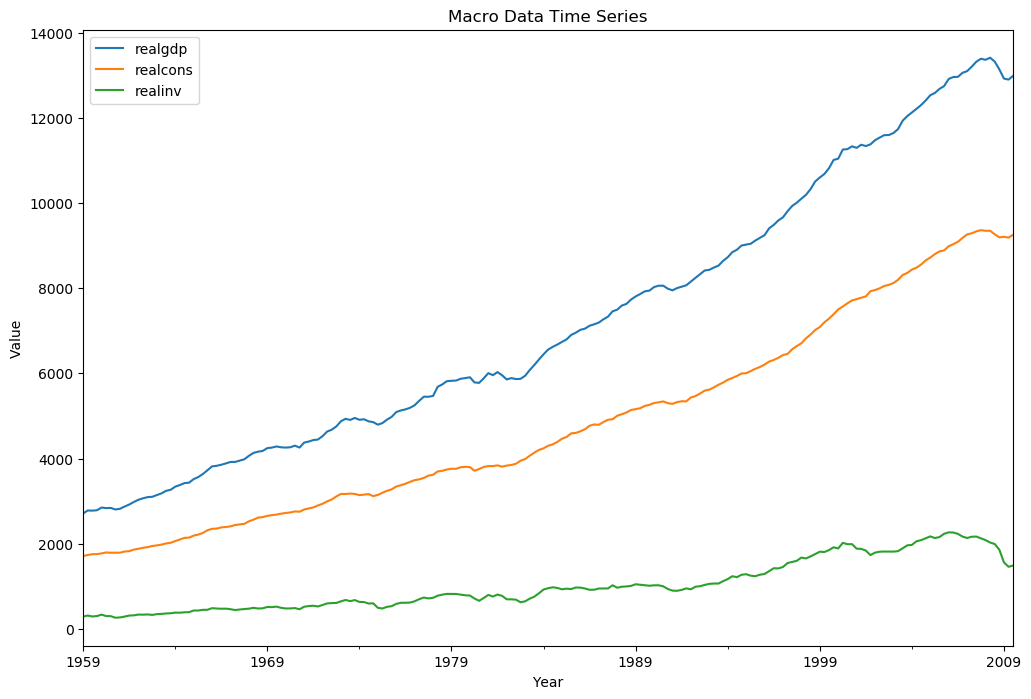

In [4]:
ts.plot(figsize=(12, 8))
plt.title('Macro Data Time Series')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [5]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna())
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    print()


In [6]:
for name, column in ts.iteritems():
    adf_test(column, name)

Augmented Dickey-Fuller Test: realgdp
ADF Statistic                    1.750463
p-value                          0.998246
#Lags Used                      12.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64

Augmented Dickey-Fuller Test: realcons
ADF Statistic                    1.549912
p-value                          0.997699
#Lags Used                       4.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64

Augmented Dickey-Fuller Test: realinv
ADF Statistic                   -1.257252
p-value                          0.648496
#Lags Used                       3.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Valu

In [7]:
ts_differenced = ts.diff().dropna()


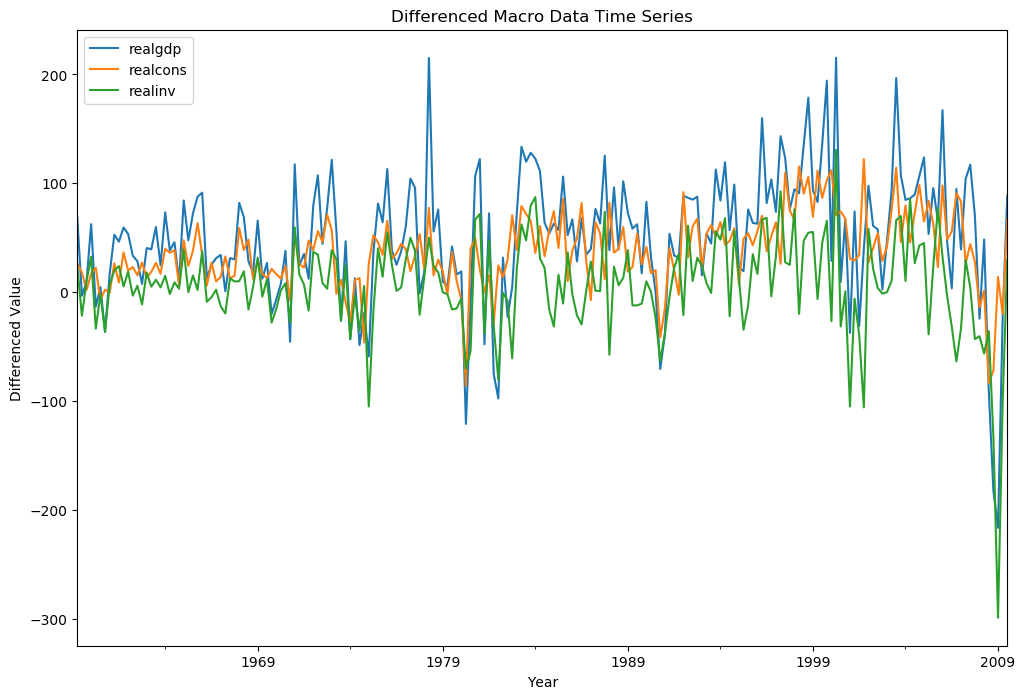

In [8]:
ts_differenced.plot(figsize=(12, 8))
plt.title('Differenced Macro Data Time Series')
plt.xlabel('Year')
plt.ylabel('Differenced Value')
plt.show()

In [9]:
for name, column in ts_differenced.iteritems():
    adf_test(column, name)


Augmented Dickey-Fuller Test: realgdp
ADF Statistic                 -6.305696e+00
p-value                        3.327882e-08
#Lags Used                     1.000000e+00
Number of Observations Used    2.000000e+02
Critical Value (1%)           -3.463476e+00
Critical Value (5%)           -2.876102e+00
Critical Value (10%)          -2.574532e+00
dtype: float64

Augmented Dickey-Fuller Test: realcons
ADF Statistic                   -4.204306
p-value                          0.000648
#Lags Used                       3.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64

Augmented Dickey-Fuller Test: realinv
ADF Statistic                   -5.350595
p-value                          0.000004
#Lags Used                       2.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176

In [10]:
model = VARMAX(ts_differenced, order=(1, 1))
results = model.fit(maxiter=1000, disp=False)
print(results.summary())


D:\Users\vgrex\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
D:\Users\vgrex\anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                   Statespace Model Results                                   
Dep. Variable:     ['realgdp', 'realcons', 'realinv']   No. Observations:                  202
Model:                                     VARMA(1,1)   Log Likelihood               -2870.399
                                          + intercept   AIC                           5794.797
Date:                                Wed, 24 Jul 2024   BIC                           5884.121
Time:                                        18:39:33   HQIC                          5830.938
Sample:                                    06-30-1959                                         
                                         - 09-30-2009                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):       0.31, 4.51, 0.74   Jarque-Bera (JB):   9.93, 10.24, 23.31
Prob(Q):                  0.58, 0.03, 0.39   Prob(JB):       

In [11]:
n_forecast = 5
forecast = results.get_forecast(steps=n_forecast)
forecast_df = forecast.summary_frame()

In [17]:
def invert_transformation(df, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df.columns
    for col in columns:        
        df_fc[col] = df[col].iloc[-1] + df_fc[col].cumsum()
    return df_fc
